In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from pickle import dump

In [4]:
X_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_train.csv')
X_train.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.6,-1.0,1.0,-0.4,0.0,0.0,-0.666667,-0.760369,3.0,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.983688,-0.712403
1,-0.2,-0.5,1.0,0.6,0.0,-1.0,-0.666667,-0.202765,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000829,0.000000
2,0.8,0.0,0.0,-0.6,0.0,0.0,-0.333333,-0.202765,1.0,1.0,1.0,-0.87500,0.332971,0.317460,-1.132430,-1.545736


In [5]:
X_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/X_test.csv')
X_test.head(3)

,age,job,marital,education,default,contact,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.533333,-1.0,1.0,-0.4,0.0,0.0,-0.666667,0.373576,0.0,0.0,0.0,-0.90625,-1.069641,-0.698413,-0.971247,-0.712403
1,0.333333,1.5,0.0,0.6,0.0,0.0,1.000000,-0.564920,-0.5,1.0,1.0,-0.37500,-0.735582,-0.031746,-0.203760,0.037209
2,-0.933333,0.0,0.0,0.0,0.0,0.0,2.000000,-0.013667,-0.5,0.0,0.0,-0.90625,-0.871600,-0.841270,-0.953000,-0.712403


In [6]:
y_train = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_train.csv')
y_train.head(3)

,y
0,0
1,0
2,0


In [7]:
y_test = pd.read_csv('/workspaces/ML-Algorithm/data/processed/y_test.csv')
y_test.head(3)

,y
0,0
1,0
2,0


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

La intercepción representa el valor de la función logística cuando todas las características son cero.

In [9]:
print(f"Intercep (a): {model.intercept_}")

Intercep (a): [-3.89177816]


Los coeficientes representan cómo cambia la probabilidad de la variable objetivo con respecto a cada característica.

In [10]:
print(f"Coefficients: {model.coef_}")

Coefficients: [[ 0.03288247  0.03817485  0.06261368  0.21131101 -0.38460684  0.81190412
   0.20177318  1.01634391 -0.07218073 -0.30792211  0.68639434 -2.77833852
   1.24163855  0.39976012  0.08089298 -0.12029892]]


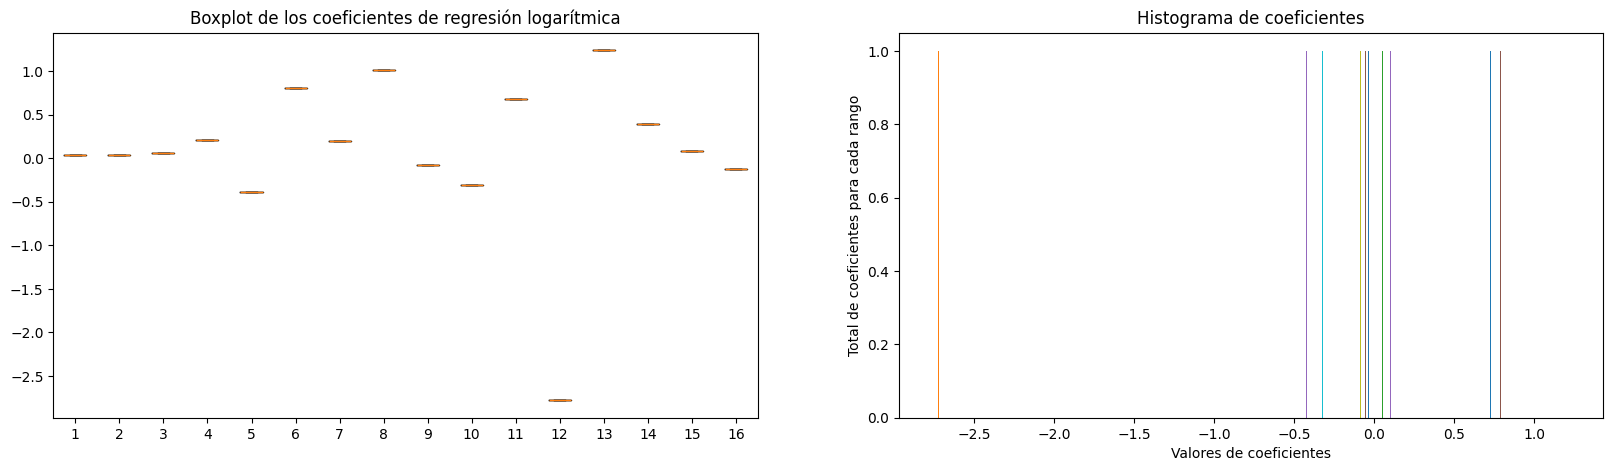

In [11]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.boxplot(model.coef_)
plt.title('Boxplot de los coeficientes de regresión logarítmica')
plt.subplot(1, 2, 2)
plt.hist(model.coef_,50)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

(El logaritmo de la odds es una transformación utilizada en estadística y aprendizaje automático, especialmente en el contexto de modelos de regresión logística. La odds representa la probabilidad de que ocurra un evento dividida por la probabilidad de que no ocurra ese evento.)

- Intercepto (a): -3.89177816.

Este valor representa el logaritmo de la odds de que la respuesta sea positiva cuando todas las características son cero. Si todas las características son cero, la probabilidad de pertenecer a la clase positiva es 
1 / (1 + 𝑒 (exp. −3.89177816)), lo cual es bastante bajo.

- Coeficientes:

X1: 0.03288247. Un aumento unitario en la característica X1 está asociado con un aumento de aproximadamente 0.03288 en el logaritmo de la odds de pertenecer a la clase positiva.

X2: 0.03817485. Un aumento unitario en la característica X2 está asociado con un aumento de aproximadamente 0.03817 en el logaritmo de la odds de pertenecer a la clase positiva.

X3: 0.06261368. Y así sucesivamente para cada característica.

- Signo de los coeficientes:

Una característica con un coeficiente positivo contribuye positivamente a la probabilidad de pertenecer a la clase positiva, mientras que una característica con un coeficiente negativo contribuye negativamente.

Las características con coeficientes mayores en magnitud tienen un impacto más fuerte en la predicción.


In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Accuracy: 0.9085610200364299
MSE: 0.09143897996357013
R2 Score: 0.06341246581226789


Exploración métricas de rendimiento del modelo:

In [14]:
def get_metrics(yhat_test, y_test, yhat_train, y_train):
    # Calcula todas las métricas para el conjunto de entrenamiento
    r2_train = r2_score(y_train, yhat_train)
    mse_train = mean_squared_error(y_train, yhat_train)
    mae_train = mean_absolute_error(y_train, yhat_train)
    medae_train = median_absolute_error(y_train, yhat_train)
    rmse_train = mean_squared_error(y_train, yhat_train, squared=False)
    
    # Calcula todas las métricas para el conjunto de prueba
    r2_test = r2_score(y_test, yhat_test)
    mse_test = mean_squared_error(y_test, yhat_test)
    mae_test = mean_absolute_error(y_test, yhat_test)
    medae_test = median_absolute_error(y_test, yhat_test)
    rmse_test = mean_squared_error(y_test, yhat_test, squared=False)
    
    # Calcula la diferencia entre las métricas de entrenamiento y prueba
    r2_diff = r2_train - r2_test
    mse_diff = mse_train - mse_test
    mae_diff = mae_train - mae_test
    medae_diff = medae_train - medae_test
    rmse_diff = rmse_train - rmse_test
    
    # Crea el DataFrame con todas las métricas
    metrics_data = {
        'R2': [r2_train, r2_test, r2_diff],
        'MSE': [mse_train, mse_test, mse_diff],
        'MAE': [mae_train, mae_test, mae_diff],
        'MedAE': [medae_train, medae_test, medae_diff],
        'RMSE': [rmse_train, rmse_test, rmse_diff]
    }
    
    return pd.DataFrame(data=metrics_data, index=['Train set', 'Test set', 'Difference'])

In [15]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [16]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,R2,MSE,MAE,MedAE,RMSE
Train set,0.084005,0.092112,0.092112,0.0,0.303500
Test set,0.063412,0.091439,0.091439,0.0,0.302389
Difference,0.020592,0.000673,0.000673,0.0,0.001112


- Exactitud (Accuracy): La exactitud del modelo es del 90.86%. Esto significa que el modelo clasifica correctamente el 90.86% de las muestras del conjunto de prueba.

- R2 Score: para el conjunto de entrenamiento es 0.08 y para el conjunto de prueba es 0.06. El R2 Score mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de 0.08 para el conjunto de entrenamiento indica que el modelo explica aproximadamente el 8% de la varianza en los datos de entrenamiento, mientras que un valor de 0.06 para el conjunto de prueba indica que explica aproximadamente el 6% de la varianza en los datos de prueba.

- Error cuadrático medio (MSE): para ambos conjuntos, entrenamiento y prueba, es 0.09. El MSE es una medida de la calidad de la predicción del modelo. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

- Error absoluto medio (MAE): Tanto para el conjunto de entrenamiento como para el conjunto de prueba, el MAE es 0.09. El MAE es la diferencia promedio entre las predicciones del modelo y los valores verdaderos. Un MAE más bajo indica una mejor precisión del modelo.

- Mediana del error absoluto (MedAE): El MedAE es 0.00 tanto para el conjunto de entrenamiento como para el conjunto de prueba. El MedAE es la mediana de los errores absolutos entre las predicciones del modelo y los valores verdaderos.

- Raíz del error cuadrático medio (RMSE): para ambos conjuntos, entrenamiento y prueba, es 0.30. El RMSE es una medida de la dispersión de las predicciones del modelo. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.

Dado que la exactitud del modelo es alta y los errores (MSE, MAE, MedAE, RMSE) son bajos, el modelo parece tener un buen rendimiento predictivo en términos de hacer predicciones precisas.
Sin embargo, parece tener un rendimiento limitado en términos de explicar la variabilidad en la variable objetivo, como lo sugieren los valores de R2 Score bajos.
Esto podría deberse a la complejidad inherente del problema o a limitaciones en las variables utilizadas para construir el modelo, por lo que, si quisieramos mejorarlo, habría que hacer una exploración más exhaustiva de los datos o un modelado más robusto.

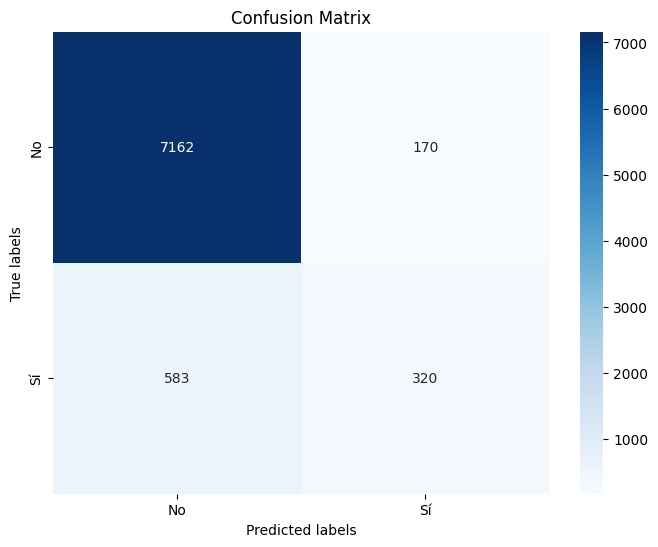

In [17]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión proporciona una visión detallada del rendimiento del modelo al clasificar las instancias en cada una de las clases. 

Interpretación de la matriz de confusión:

- Verdaderos positivos (TP): 7162 instancias fueron correctamente clasificadas como positivas (clase 1).
- Falsos negativos (FN): 170 instancias fueron incorrectamente clasificadas como negativas cuando en realidad son positivas.
- Falsos positivos (FP): 583 instancias fueron incorrectamente clasificadas como positivas cuando en realidad son negativas.
- Verdaderos negativos (TN): 320 instancias fueron correctamente clasificadas como negativas (clase 0).

Hay buen número de verdaderos positivos, lo que indica que el modelo puede clasificar correctamente muchas instancias de la clase positiva, pero también tienes una cantidad significativa de falsos positivos, lo que sugiere que el modelo puede estar cometiendo errores al clasificar instancias negativas como positivas.

Búsqueda de Hiperparámetros

In [18]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'C': np.logspace(-3, 3, 7),
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2002, 3000]
}


# Inicializing the grid
grid = GridSearchCV(model, param_grid=param_grid, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 2002, 3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

In [19]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Advertencias indican que se pasó un vector de columna y cuando se esperaba un array 1D en varias partes del código. La advertencia sugiere cambiar la forma de y a (n_samples,), por ejemplo, utilizando la función ravel().

Esto generalmente ocurre cuando estás trabajando con modelos de clasificación en Scikit-learn y proporcionas y como un vector de columna en lugar de un array 1D. La función ravel() se utiliza para convertir y en un array 1D.

Esto asegurará que y_train y y_test tengan la forma adecuada antes de pasarlos al modelo.

In [20]:
grid.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solv

Mejores hiperparámetros encontrados:
{'C': 1.0, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
model_grid = LogisticRegression(penalty= 'l1', C= 1.0, class_weight= None, solver= 'liblinear', max_iter= 1000)

model_grid.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [22]:
grid_y_pred = model_grid.predict(X_test)

In [23]:
print(f"Accuracy: {accuracy_score(y_test, grid_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, grid_y_pred)}")
print(f"R2 Score: {r2_score(y_test, grid_y_pred)}")

Accuracy: 0.9085610200364299
MSE: 0.09143897996357013
R2 Score: 0.06341246581226789


In [24]:
yhat_train_grid = model_grid.predict(X_train)
yhat_test_grid = model_grid.predict(X_test)

In [25]:
get_metrics(yhat_test_grid, y_test, yhat_train_grid, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,R2,MSE,MAE,MedAE,RMSE
Train set,0.084306,0.092082,0.092082,0.0,0.303450
Test set,0.063412,0.091439,0.091439,0.0,0.302389
Difference,0.020894,0.000643,0.000643,0.0,0.001062


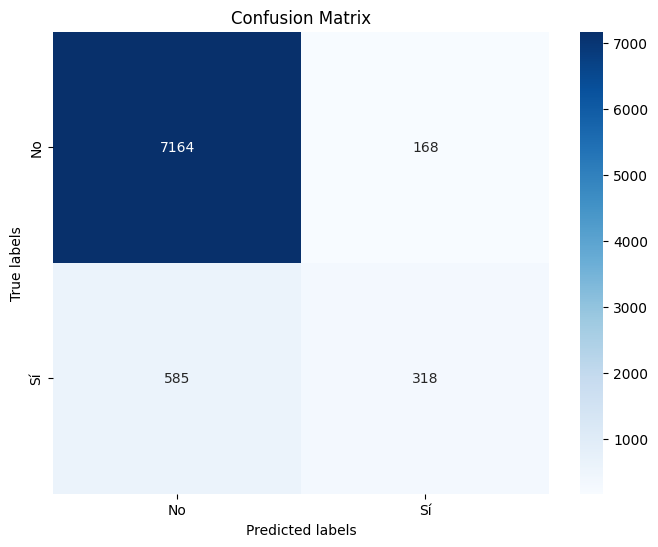

In [26]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, grid_y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Guardar el modelo
with open('/workspaces/ML-Algorithm/models/LogisticRegrssion-l1-liblinear.pkl', 'wb') as archivo:
    dump(model_grid, archivo)

In [28]:
model_balanced = LogisticRegression(class_weight= 'balanced')

model_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [29]:
balanced_y_pred = model_balanced.predict(X_test)

In [30]:
print(f"Accuracy: {accuracy_score(y_test, balanced_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, balanced_y_pred)}")
print(f"R2 Score: {r2_score(y_test, balanced_y_pred)}")

Accuracy: 0.8592592592592593
MSE: 0.14074074074074075
R2 Score: -0.44157364159838175


In [31]:
yhat_train_balanced = model_balanced.predict(X_train)
yhat_test_balanced = model_balanced.predict(X_test)

In [32]:
get_metrics(yhat_test_balanced, y_test, yhat_train_balanced, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,R2,MSE,MAE,MedAE,RMSE
Train set,-0.475133,0.148339,0.148339,0.0,0.385148
Test set,-0.441574,0.140741,0.140741,0.0,0.375154
Difference,-0.033560,0.007599,0.007599,0.0,0.009994


El modelo con ponderación de clases no parece mejorar el rendimiento del modelo logistic regression en comparación con el modelo sin ponderación de clases en este caso. De hecho, parece que empeora el rendimiento en términos de varias métricas de evaluación.